# ARMAX Prediction for Bitcoin

In [1]:
# Import Necessary Libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

import statsmodels.api as sm
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

In [2]:
# Import Dataset
D = pd.read_csv('MIS776_PROJECT_DB.xlsx - TheData.csv')#Remove columns with large amounts of missing values and interpolate the missing values in SP500 and NASDAQ
D = D.drop(['ASOPR','lagged EMA50','%Change'], axis=1)
D =D.set_index('Date').asfreq('D')
# Interpolate the NASDAQ and Sp500 missing weekend values
D = D.interpolate()
D.isnull().sum()


close           0
EMA50           0
RSI             0
RSI-based MA    0
RSI-RSIMA       0
ATR             0
ADX             0
MACD            0
RP              0
RHODL           0
RR              0
MVRV-Z          0
SupplyP         0
MinerFeeRev%    0
Thermocap       0
AA              0
AVGFees         0
Puell           0
INVCAP          0
AccuTrend       0
NUPL            0
BTCINFLATION    0
Liveliness      0
NVT             0
CVDD            0
SP500           0
NASDAQ          0
POSNEG          0
Categories      0
dtype: int64

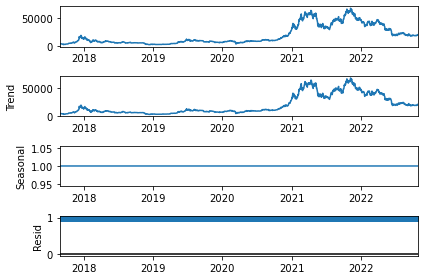

In [3]:
# Time series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
analysis = D[['close']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative",freq = 1)

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

In [4]:
# function to determine ACF and PACF
def tsplot(y, title, lags=None, figsize=(10, 6)):
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))

    y.plot(ax=ts_ax)
    ts_ax.set_title(title, fontsize=12, fontweight='bold')
    y.plot(ax=hist_ax, kind='hist', bins=25)
    hist_ax.set_title('Histogram')
    sm.tsa.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    sm.tsa.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    sns.despine()
    plt.tight_layout()
    plt.show()
    return ts_ax, acf_ax, pacf_ax

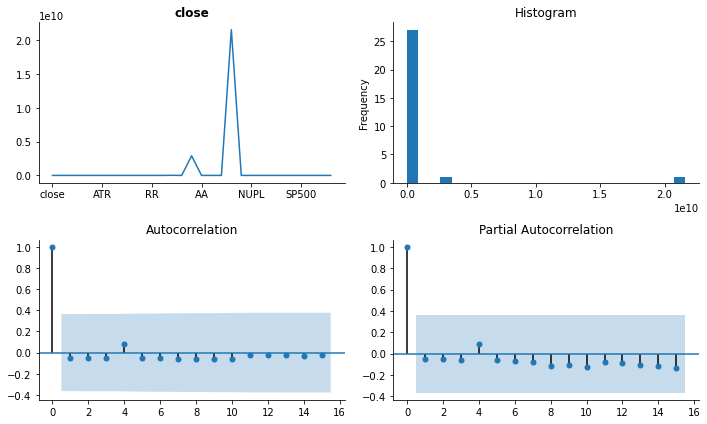

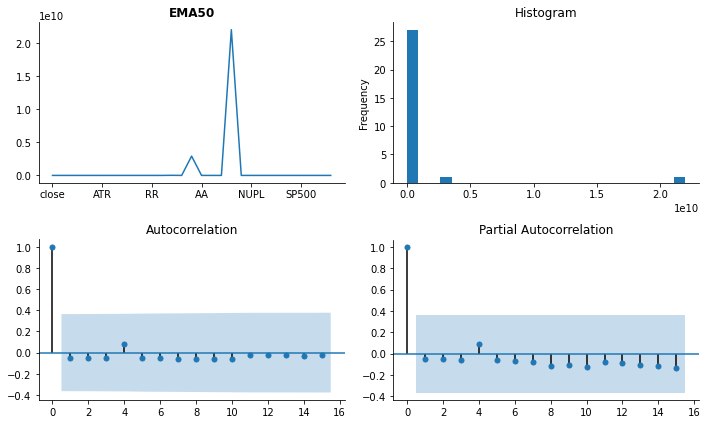

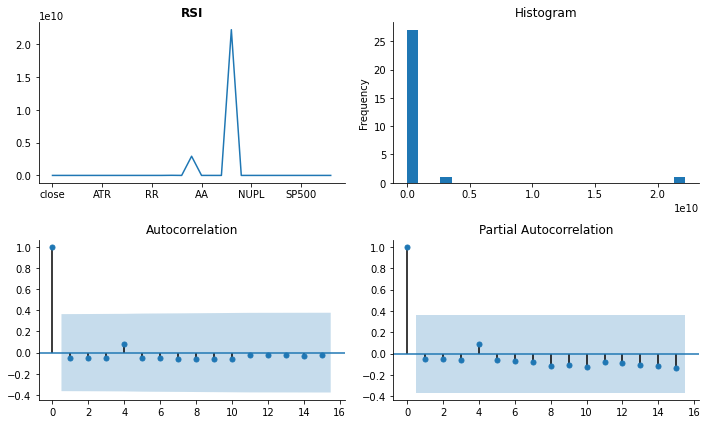

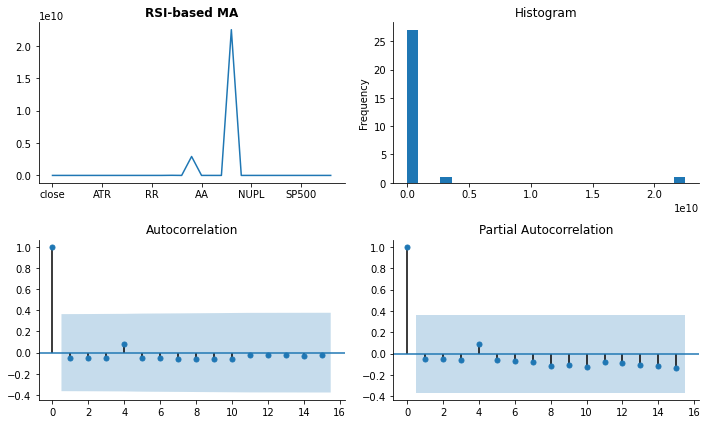

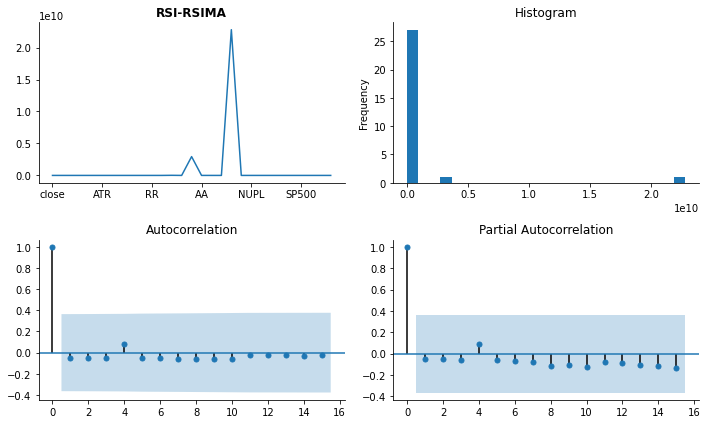

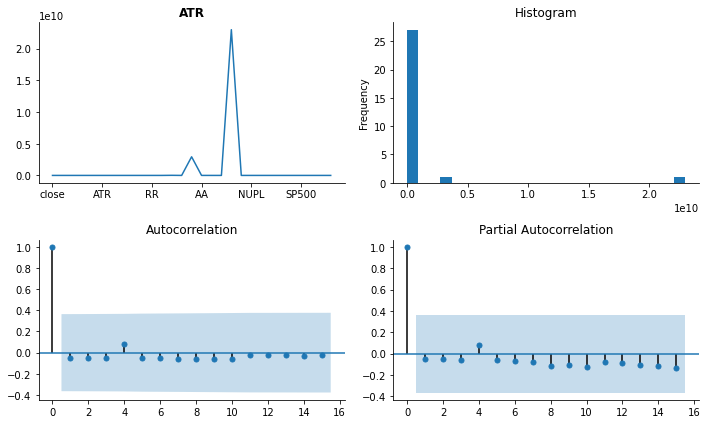

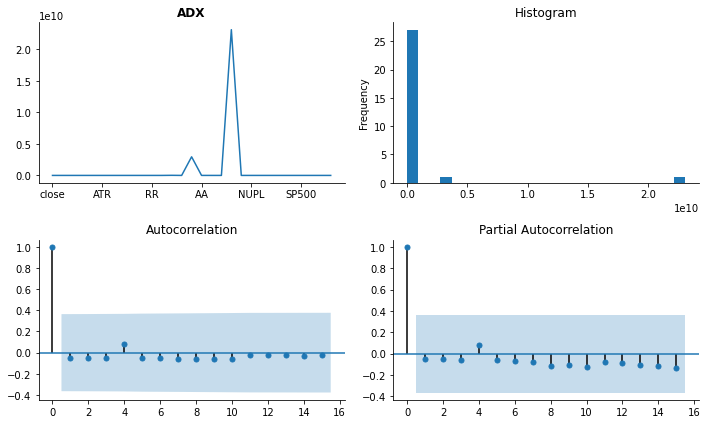

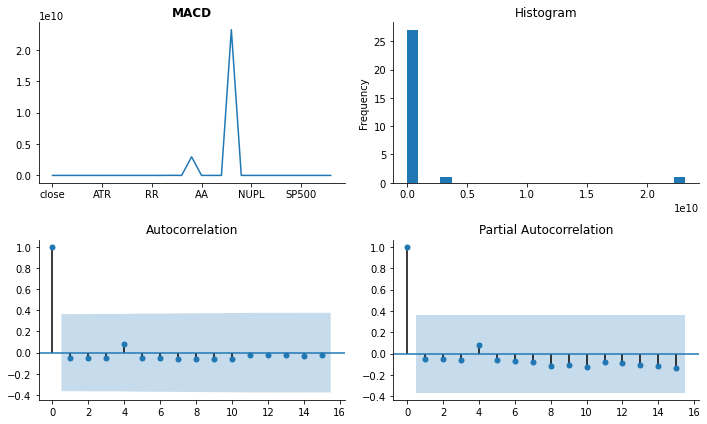

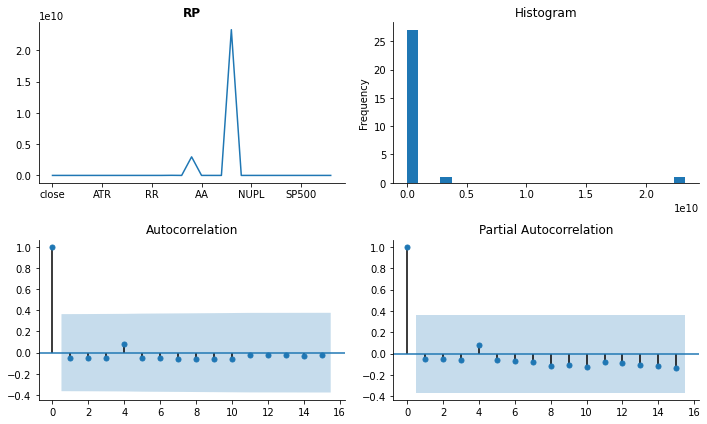

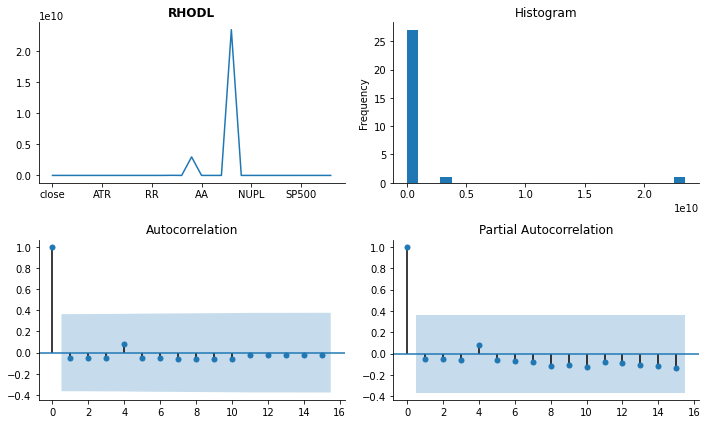

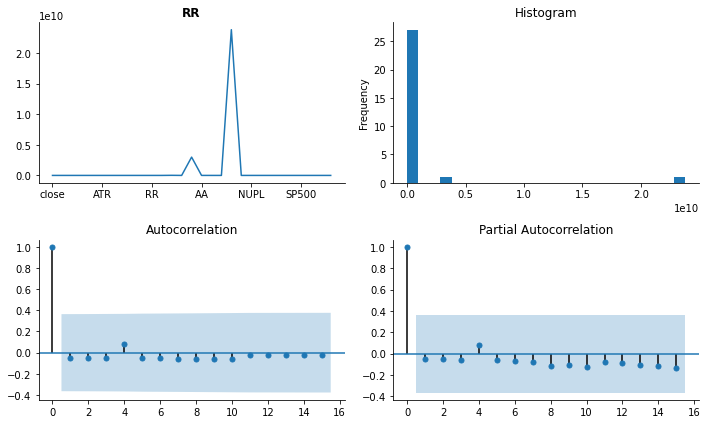

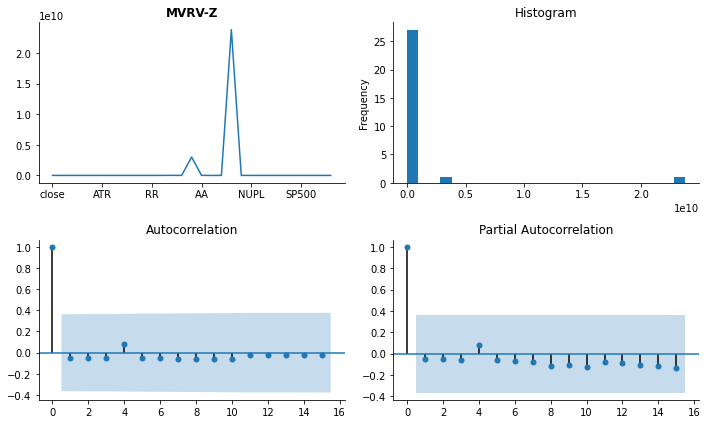

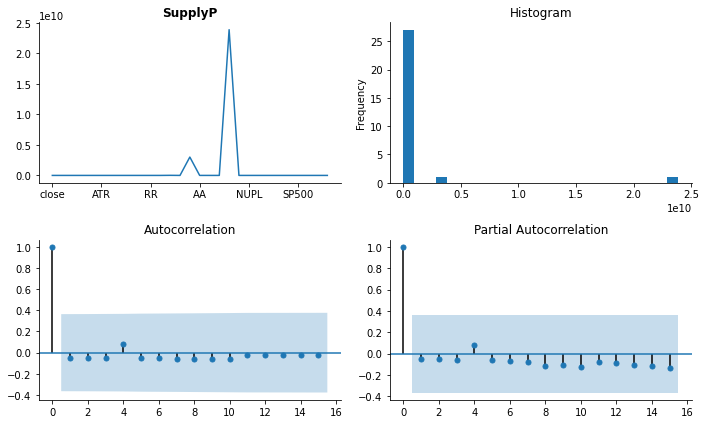

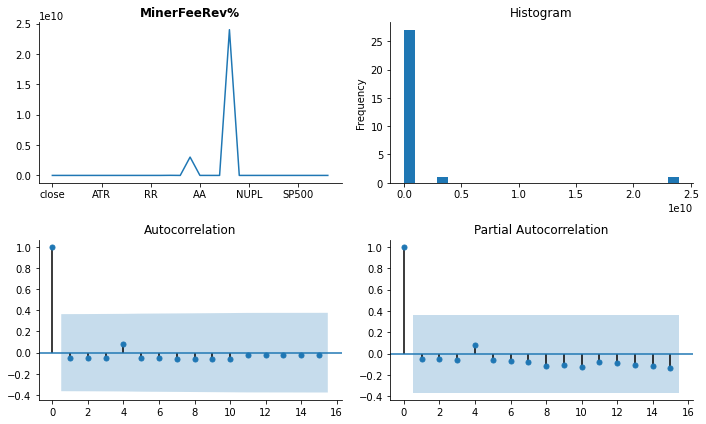

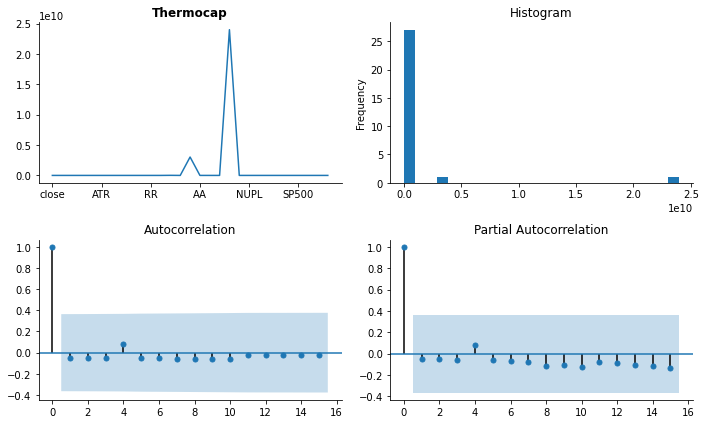

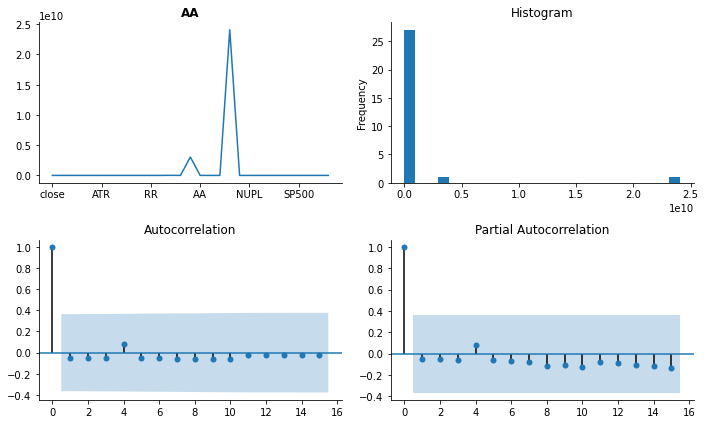

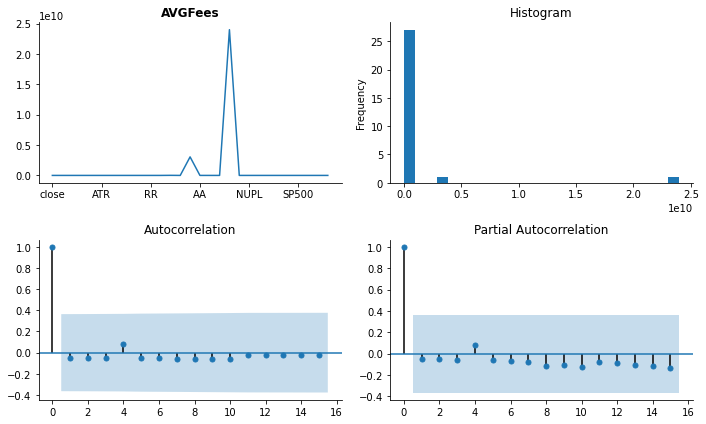

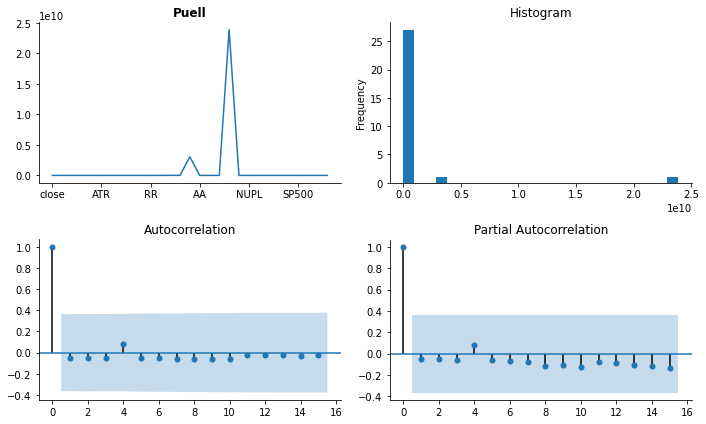

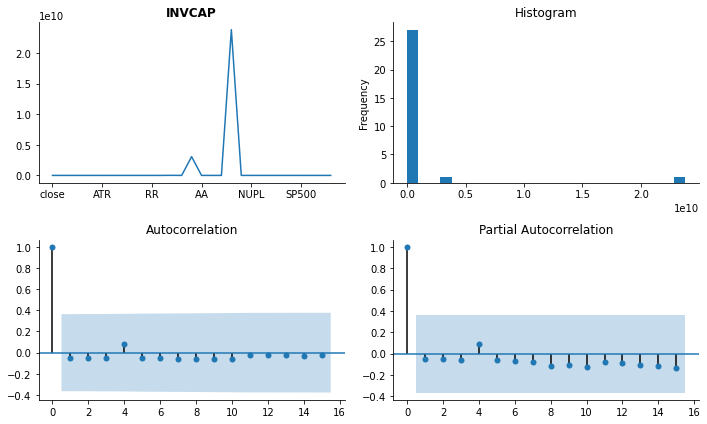

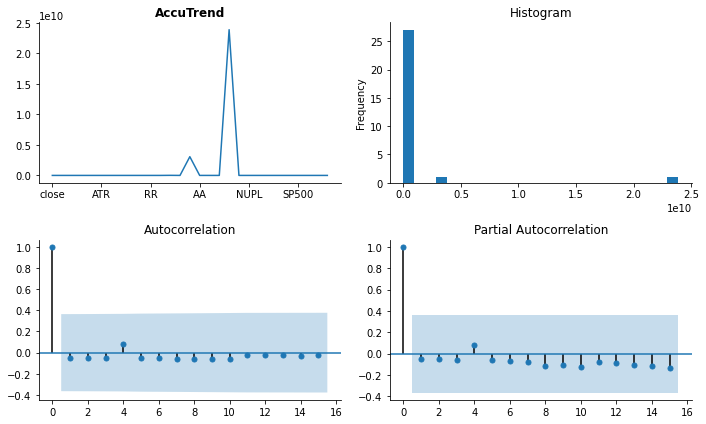

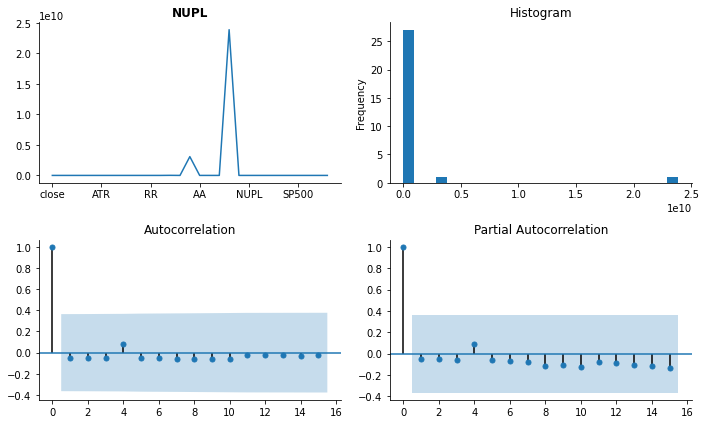

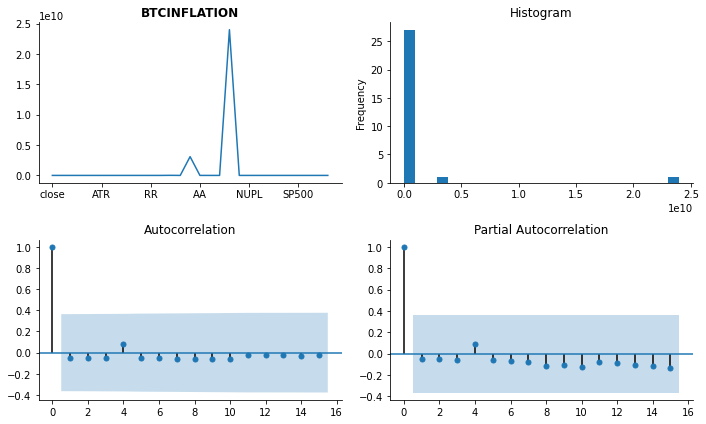

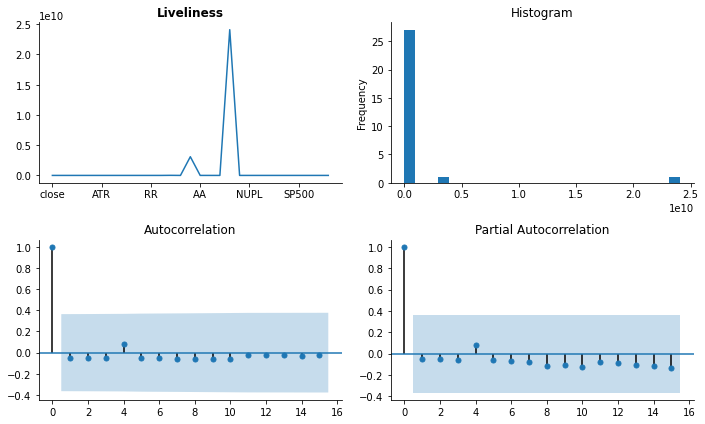

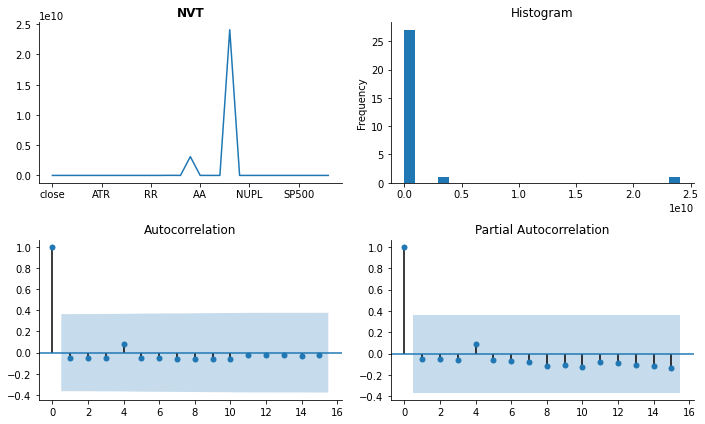

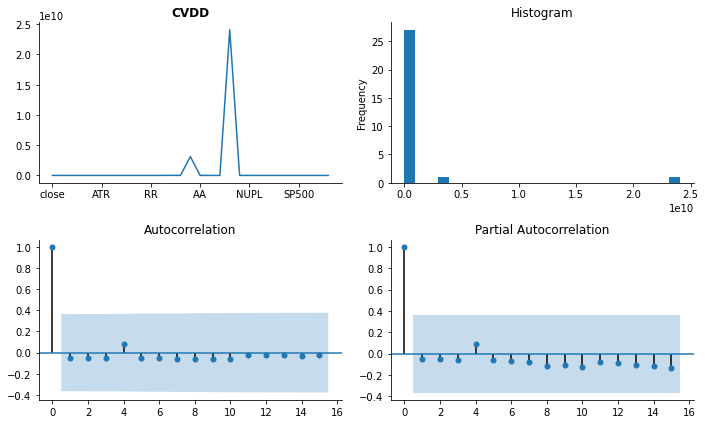

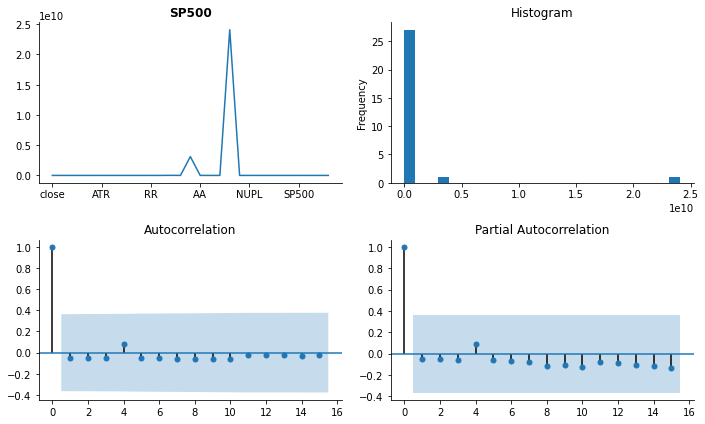

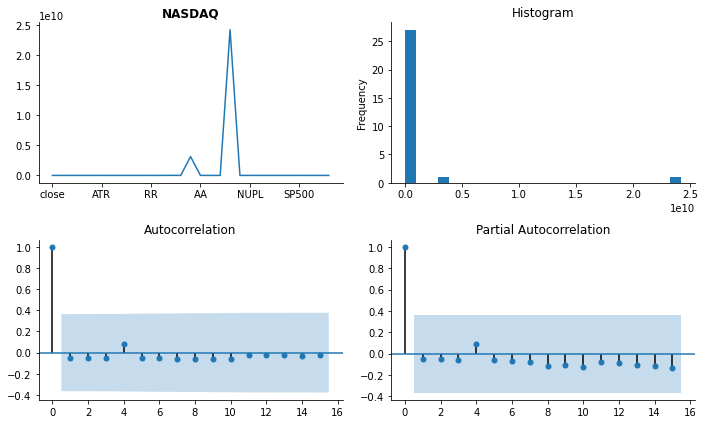

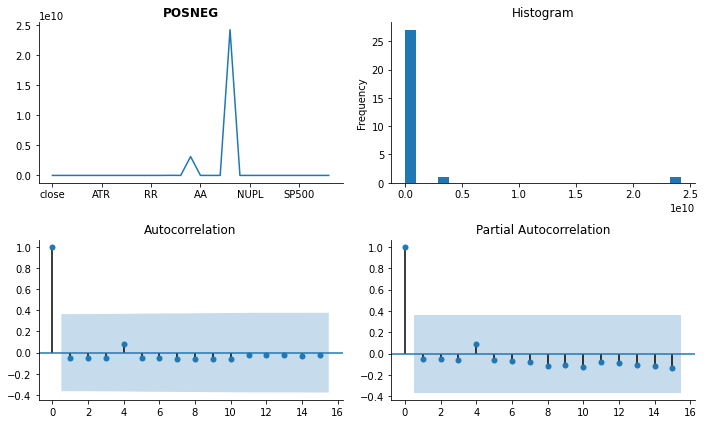

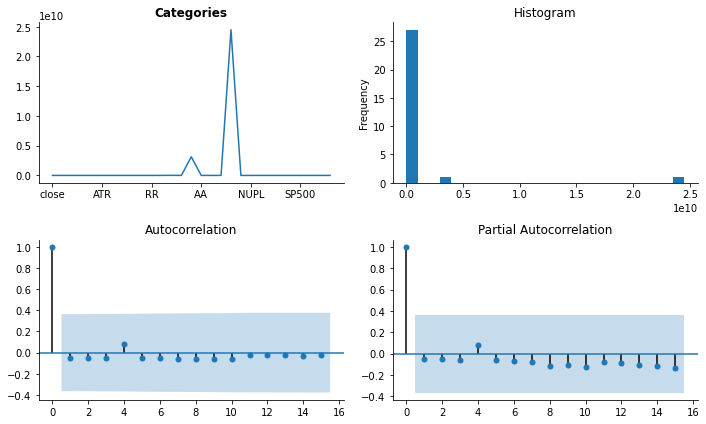

In [5]:
for i in range(len(D.columns)):
    y = D.iloc[i]
    yt = D.columns[i]
    tsplot(y, yt)

In [6]:
# Function to determine stationarity
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, sig=0.05, name=''):
    res = adfuller(series, autolag='AIC')    
    p_value = round(res[1], 3) 

    if p_value <= sig:
        print(f" {name} : P-Value = {p_value} => Stationary. ")
    else:
        print(f" {name} : P-Value = {p_value} => Non-stationary.")

for name, column in D.iteritems():
    adfuller_test(column, name=column.name)

 close : P-Value = 0.527 => Non-stationary.
 EMA50 : P-Value = 0.32 => Non-stationary.
 RSI : P-Value = 0.0 => Stationary. 
 RSI-based MA : P-Value = 0.003 => Stationary. 
 RSI-RSIMA : P-Value = 0.0 => Stationary. 
 ATR : P-Value = 0.341 => Non-stationary.
 ADX : P-Value = 0.0 => Stationary. 
 MACD : P-Value = 0.0 => Stationary. 
 RP : P-Value = 0.821 => Non-stationary.
 RHODL : P-Value = 0.01 => Stationary. 
 RR : P-Value = 0.145 => Non-stationary.
 MVRV-Z : P-Value = 0.174 => Non-stationary.
 SupplyP : P-Value = 0.04 => Stationary. 
 MinerFeeRev% : P-Value = 0.025 => Stationary. 
 Thermocap : P-Value = 0.98 => Non-stationary.
 AA : P-Value = 0.276 => Non-stationary.
 AVGFees : P-Value = 0.007 => Stationary. 
 Puell : P-Value = 0.133 => Non-stationary.
 INVCAP : P-Value = 0.871 => Non-stationary.
 AccuTrend : P-Value = 0.0 => Stationary. 
 NUPL : P-Value = 0.295 => Non-stationary.
 BTCINFLATION : P-Value = 0.609 => Non-stationary.
 Liveliness : P-Value = 0.001 => Stationary. 
 NVT : P

In [7]:
transformed = D - D.shift(1)

In [8]:
transformed = transformed.dropna()

In [9]:
for name, column in transformed.iteritems():
    adfuller_test(column, name=column.name)

 close : P-Value = 0.0 => Stationary. 
 EMA50 : P-Value = 0.001 => Stationary. 
 RSI : P-Value = 0.0 => Stationary. 
 RSI-based MA : P-Value = 0.0 => Stationary. 
 RSI-RSIMA : P-Value = 0.0 => Stationary. 
 ATR : P-Value = 0.0 => Stationary. 
 ADX : P-Value = 0.0 => Stationary. 
 MACD : P-Value = 0.0 => Stationary. 
 RP : P-Value = 0.001 => Stationary. 
 RHODL : P-Value = 0.0 => Stationary. 
 RR : P-Value = 0.0 => Stationary. 
 MVRV-Z : P-Value = 0.0 => Stationary. 
 SupplyP : P-Value = 0.0 => Stationary. 
 MinerFeeRev% : P-Value = 0.0 => Stationary. 
 Thermocap : P-Value = 0.182 => Non-stationary.
 AA : P-Value = 0.0 => Stationary. 
 AVGFees : P-Value = 0.0 => Stationary. 
 Puell : P-Value = 0.0 => Stationary. 
 INVCAP : P-Value = 0.0 => Stationary. 
 AccuTrend : P-Value = 0.0 => Stationary. 
 NUPL : P-Value = 0.0 => Stationary. 
 BTCINFLATION : P-Value = 0.0 => Stationary. 
 Liveliness : P-Value = 0.0 => Stationary. 
 NVT : P-Value = 0.0 => Stationary. 
 CVDD : P-Value = 0.033 => Sta

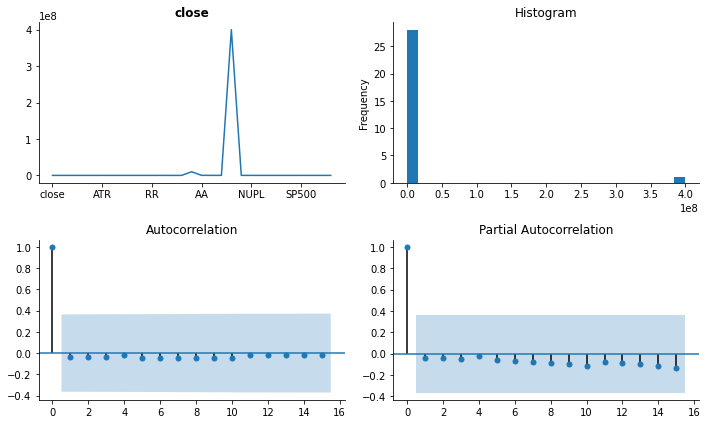

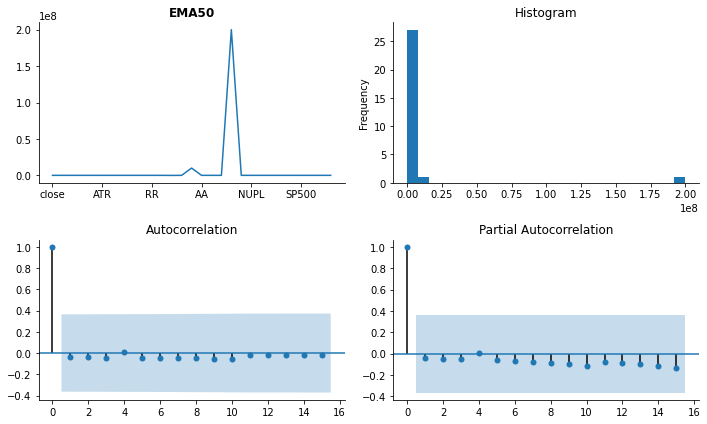

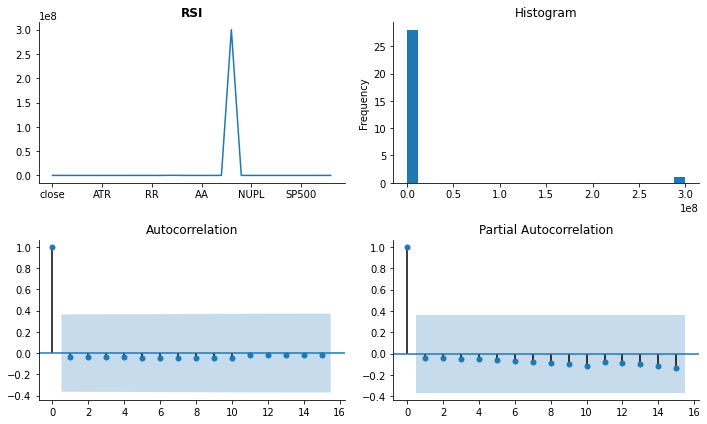

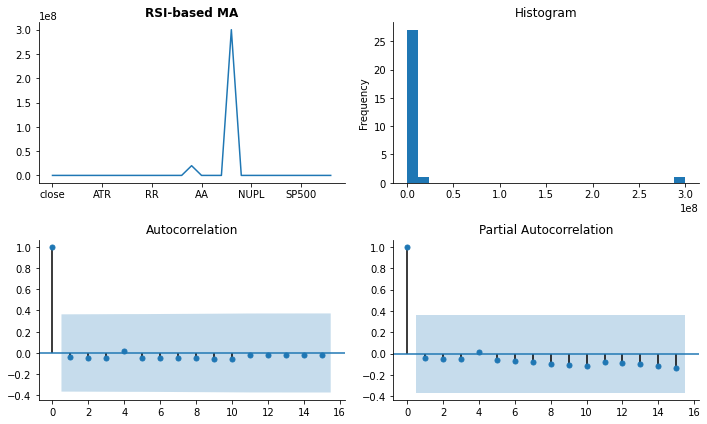

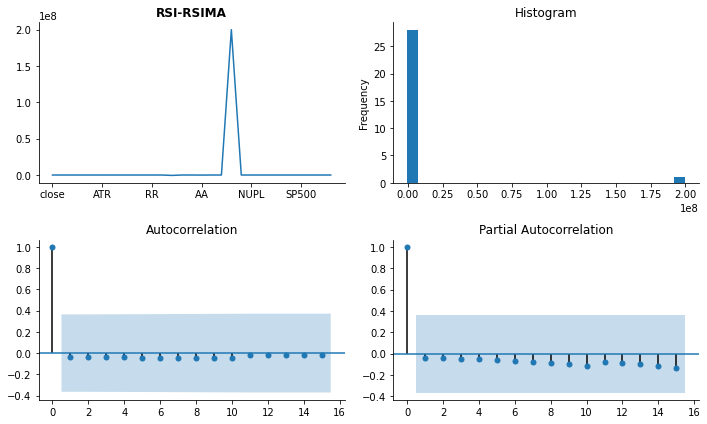

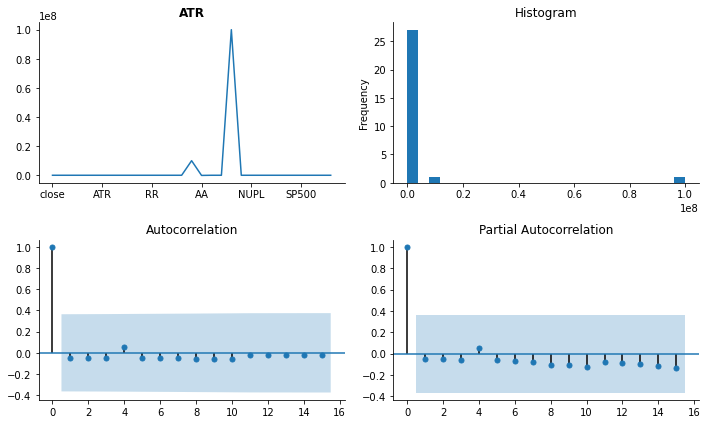

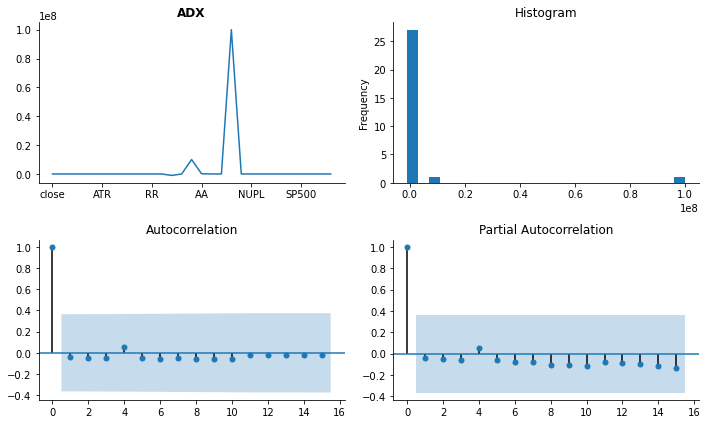

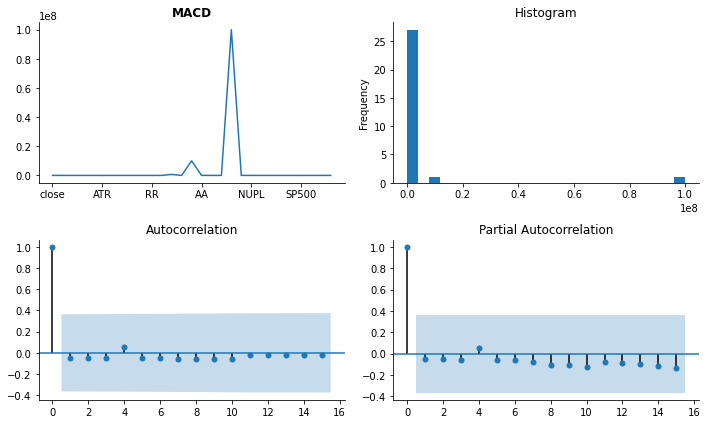

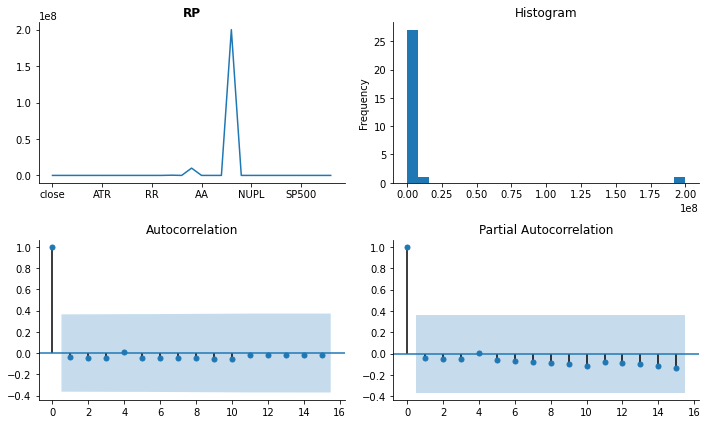

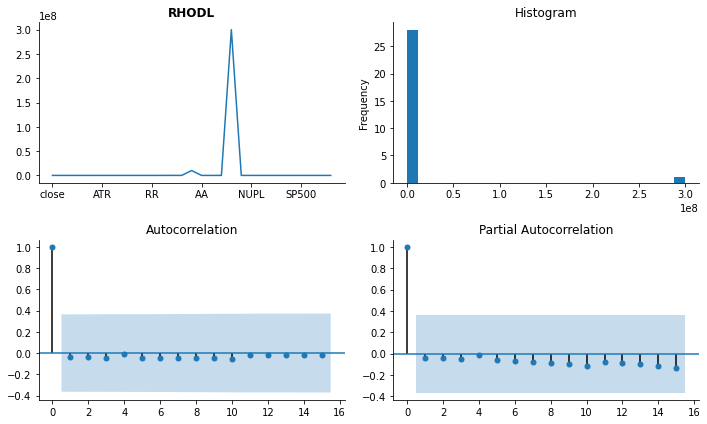

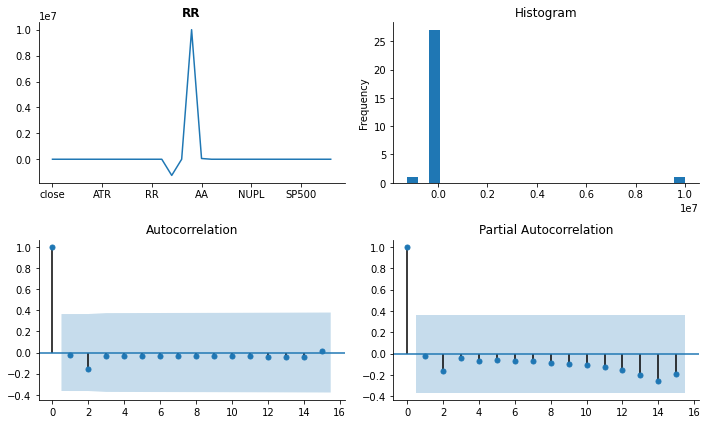

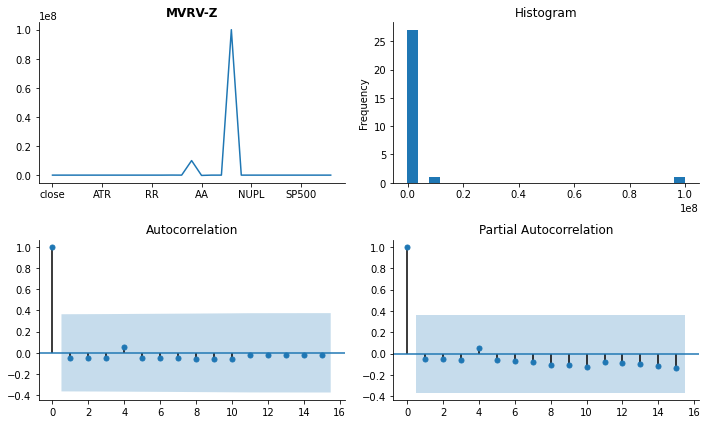

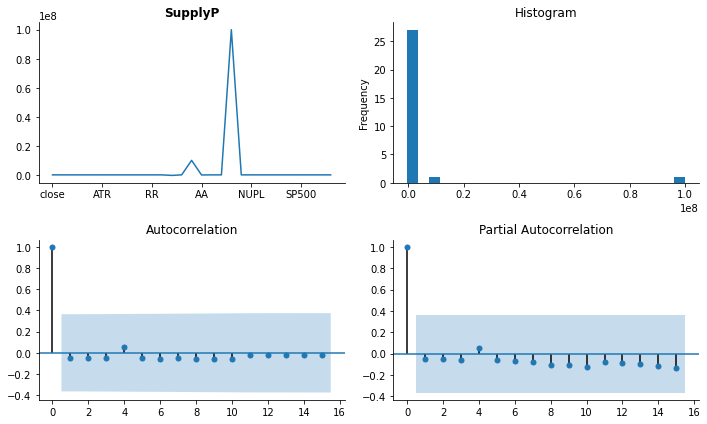

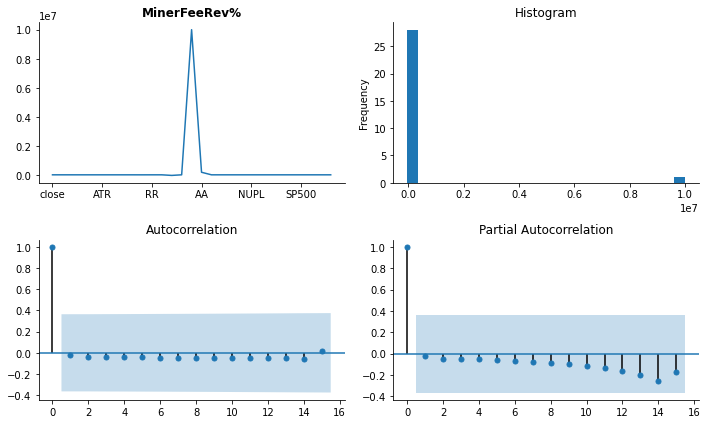

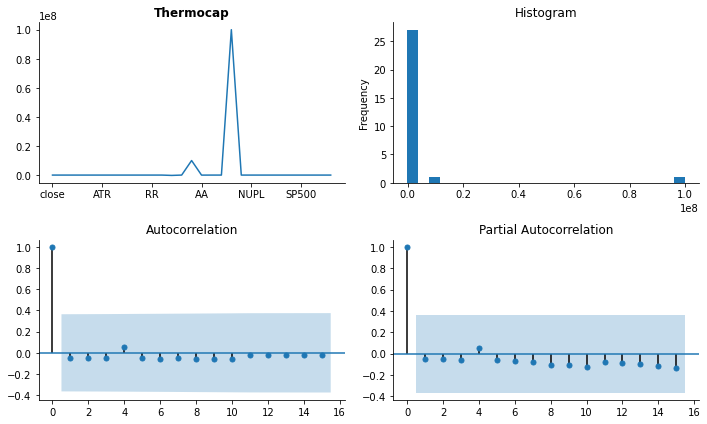

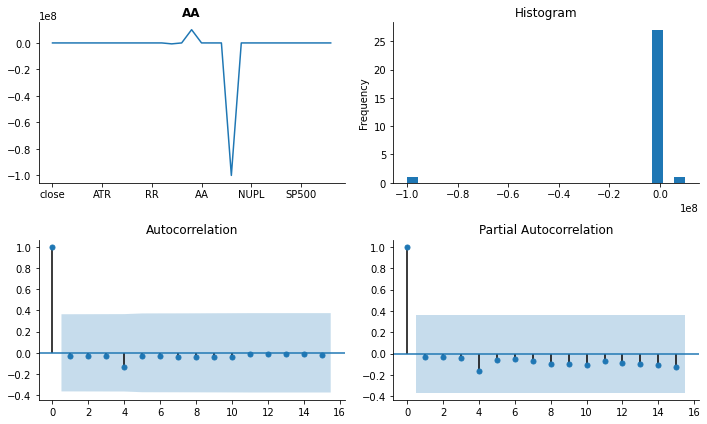

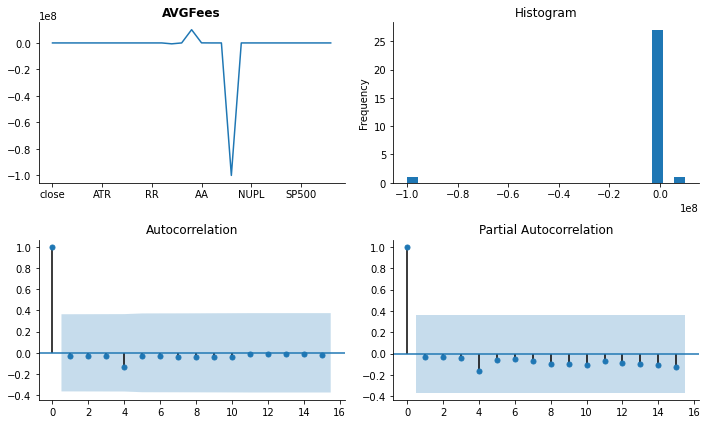

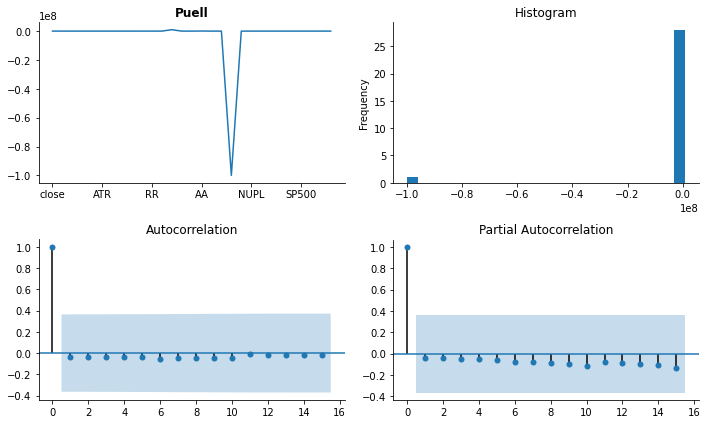

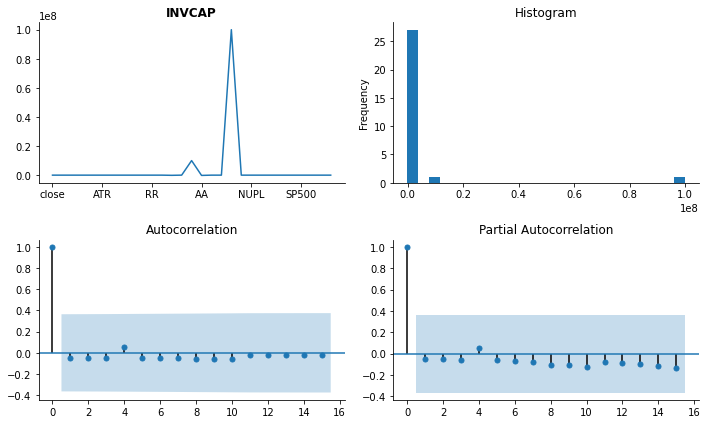

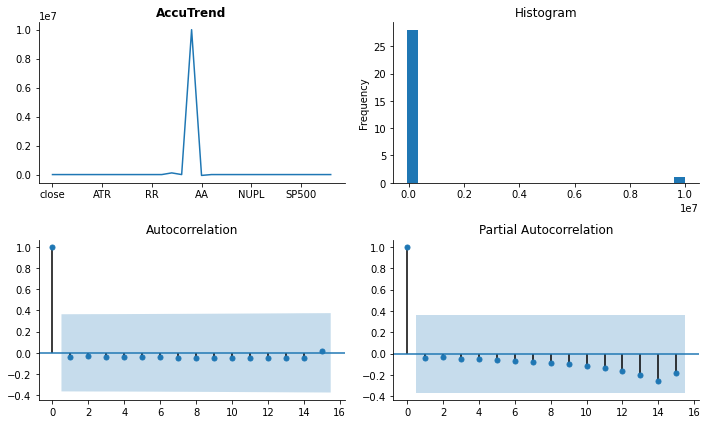

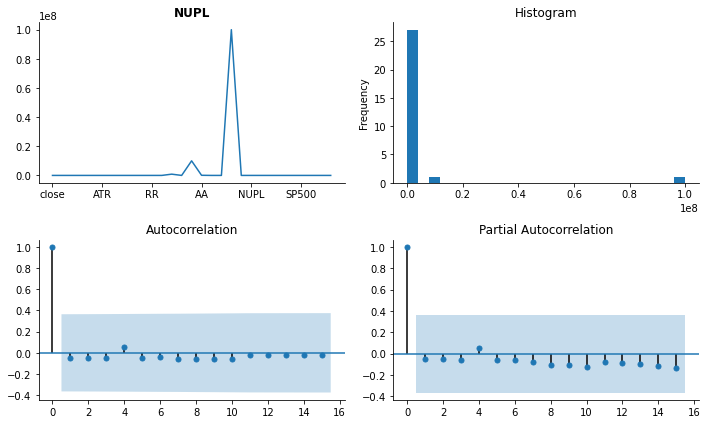

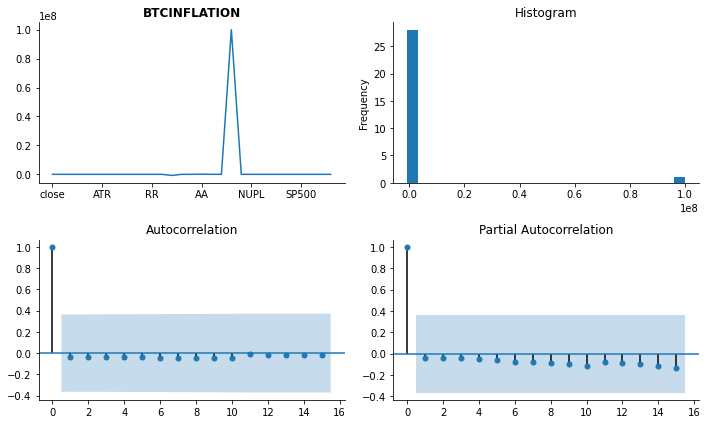

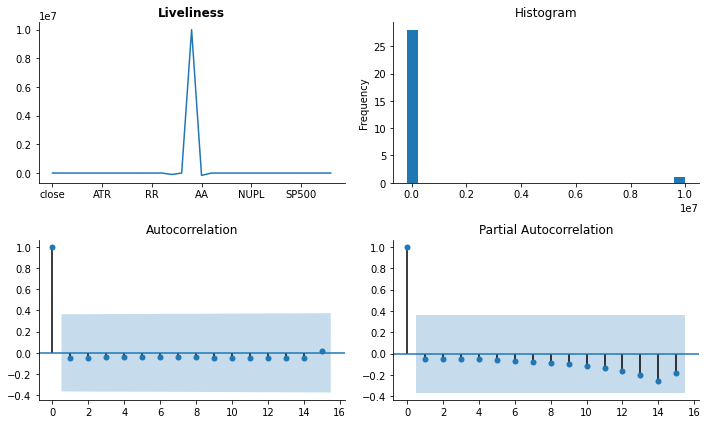

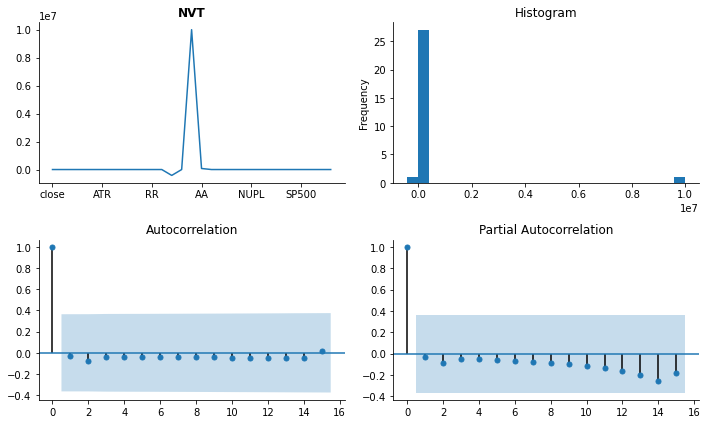

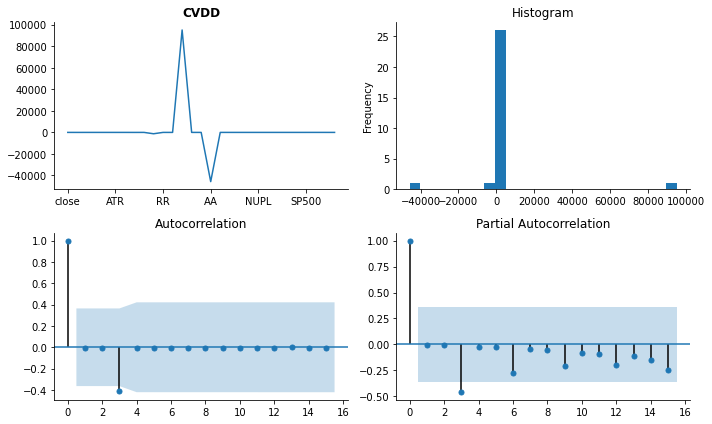

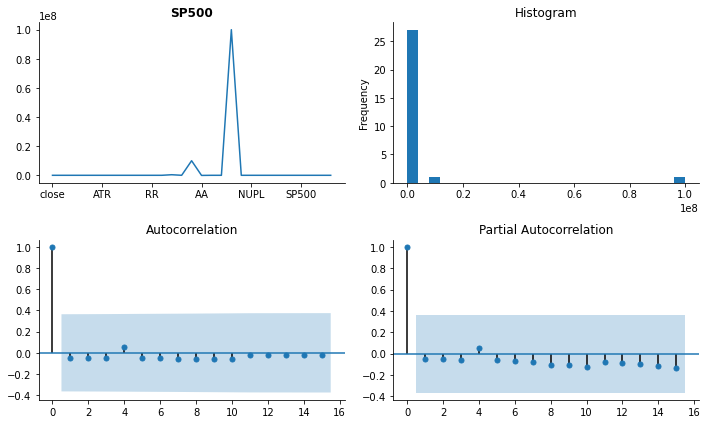

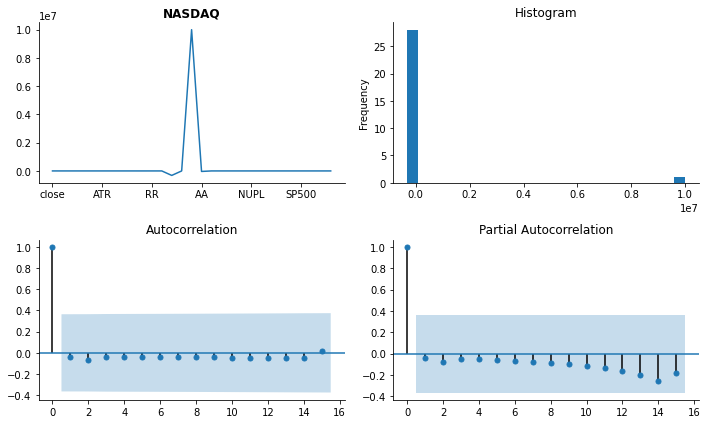

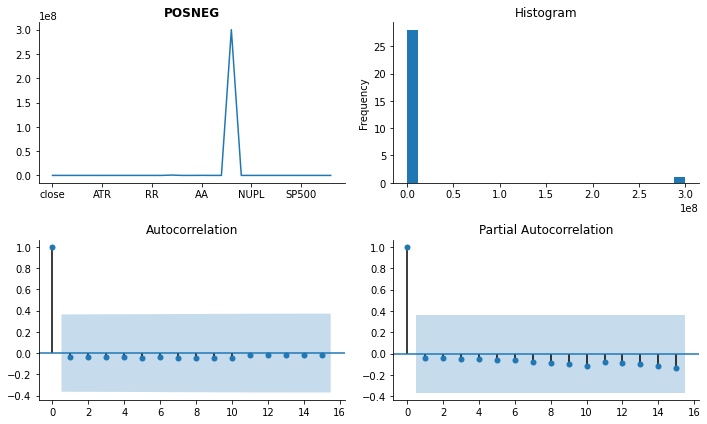

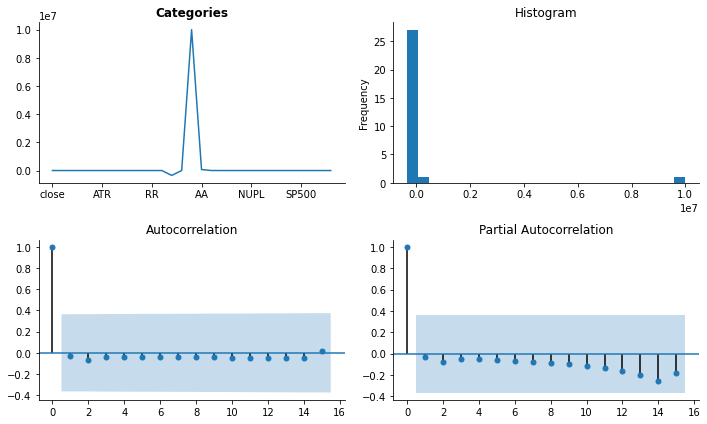

In [10]:
for i in range(len(transformed.columns)):
    y = transformed.iloc[i]
    yt = transformed.columns[i]
    tsplot(y, yt)

In [11]:
testSet = transformed.iloc[1:1880,]
m3 = testSet.loc[:,['close', 'RSI-RSIMA','MACD', 'RP', 'RHODL']]

In [12]:
mod = sm.tsa.VARMAX(m3)
res = mod.fit()

In [13]:
res.summary()

Dep. Variable:,"['close', 'RSI-RSIMA', 'MACD', 'RP', 'RHODL']",No. Observations:,1879
Model:,VAR(1),Log Likelihood,-51251.724
,+ intercept,AIC,102593.448
Date:,"Sun, 29 Jan 2023",BIC,102842.680
Time:,07:34:37,HQIC,102685.250
Sample:,08-30-2017,,
,- 10-21-2022,,
Covariance Type:,opg,,
Ljung-Box (Q):,"126.38, 82.75, 11102.67, 823.90, 607.15",Jarque-Bera (JB):,"7141.30, 3339.05, 2759.89, 73019.31, 851983.57"
Prob(Q):,"0.00, 0.00, 0.00, 0.00, 0.00",Prob(JB):,"0.00, 0.00, 0.00, 0.00, 0.00"
Heteroskedasticity (H):,"14.87, 0.32, 12.38, 9.89, 0.14",Skew:,"-0.19, -0.41, 1.13, 2.96, 3.34"


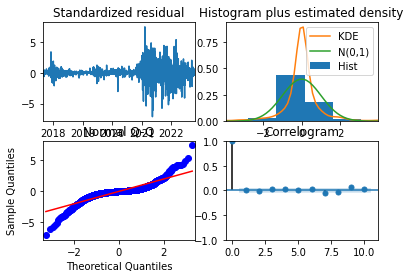

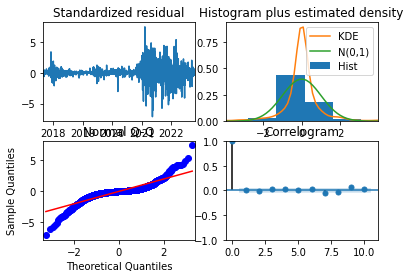

In [14]:
res.plot_diagnostics()

In [15]:
fc = pd.DataFrame(res.forecast(steps = 8))

In [16]:
fc2 = pd.DataFrame(res.get_forecast(steps = 8).summary_frame())

In [18]:
# Forecast dataframe

df_forecast = fc.join(fc2)
df_forecast

,close,RSI-RSIMA,MACD,RP,RHODL,mean,mean_se,mean_ci_lower,mean_ci_upper
2022-10-22,4.845590,0.164706,7.111701,-0.682919,-4.131533,4.845590,1011.420592,-1977.502344,1987.193523
2022-10-23,3.283293,0.046593,8.138006,2.890957,-1.457759,3.283293,1012.789835,-1981.748307,1988.314893
2022-10-24,4.934401,0.005815,8.166784,5.318892,-0.089770,4.934401,1012.958405,-1980.427590,1990.296392
2022-10-25,6.023037,-0.016404,7.661897,6.967345,0.303640,6.023037,1012.996683,-1979.413978,1991.460052
2022-10-26,6.723875,-0.027753,6.895884,8.085461,0.034721,6.723875,1013.012114,-1978.743385,1992.191135
2022-10-27,7.168485,-0.032419,6.034007,8.843392,-0.623763,7.168485,1013.018819,-1978.311916,1992.648887
2022-10-28,7.446898,-0.033117,5.172993,9.356875,-1.473668,7.446898,1013.022017,-1978.039771,1992.933566
2022-10-29,7.617678,-0.031592,4.365865,9.704559,-2.383805,7.617678,1013.023629,-1977.872150,1993.107505


In [19]:
df_forecast = df_forecast.add_suffix("_Predict")
x1 = df_forecast["close_Predict"]
DDD = D[1881:1888]
x2 = DDD["close"]
df3 = x1 + x2.shift(1)
df3 = pd.DataFrame(df3)

In [20]:
df3.columns = ["Close_Predict"]


In [21]:
df_test = D[1882:1888]
df_test = df_test.loc[:,['close', 'RSI-RSIMA','MACD', 'RP', 'RHODL']]

In [22]:
y1 = df_test["close"]
x3 = pd.concat([y1,df3], axis =1)

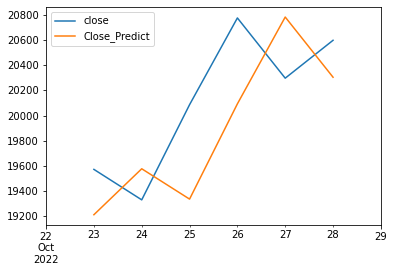

In [23]:
# shade the area between your confidence limits
x3.plot()


In [24]:
# Function to determine forecast accuracy
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})

print('Forecast Accuracy of: close')
accuracy_prod = forecast_accuracy(x3['Close_Predict'].values, x3['close'])
accuracy_prod

Forecast Accuracy of: close


{'mape': 0.02325384604632241,
 'me': -225.53833523037005,
 'mae': 469.7259641556314,
 'mpe': -0.01102030229584894,
 'rmse': 506.70689724804464}

## Forecasts from full model for one week.

In [25]:
df_full = D.loc[:,['close', 'RSI-RSIMA','MACD', 'RP', 'RHODL']]

In [31]:
dFull = df_full - df_full.shift(1)

In [48]:
modF = sm.tsa.VARMAX(df_full)
resF = modF.fit()

C:\Users\13094\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [56]:
# Forecast
fc = resF.forecast(steps = 10)
df_forecastF = pd.DataFrame(fc)
df_forecastF

,close,RSI-RSIMA,MACD,RP,RHODL
2022-10-29,20573.176177,8.198123,270.320708,21109.134633,501.172874
2022-10-30,20550.317925,6.525798,332.830094,21101.985887,658.607473
2022-10-31,20529.055985,5.087241,380.848295,21094.081383,787.254934
2022-11-01,20509.147864,3.852692,416.439565,21085.456770,890.849162
2022-11-02,20490.383227,2.796075,441.403979,21076.145857,972.660447
2022-11-03,20472.579872,1.894545,457.310178,21066.180733,1035.552347
2022-11-04,20455.580190,1.128088,465.524094,21055.591880,1082.031623
2022-11-05,20439.248061,0.479181,467.234146,21044.408271,1114.292075
2022-11-06,20423.466145,-0.067522,463.473351,21032.657465,1134.253011
2022-11-07,20408.133490,-0.525450,455.138711,21020.365691,1143.593010


In [57]:
newData = pd.read_csv('bitcoin-price-usd (3).csv')
newData =newData.set_index('date').asfreq('D')
newData.columns = ["Close_Actual"]
newData = pd.DataFrame(newData)

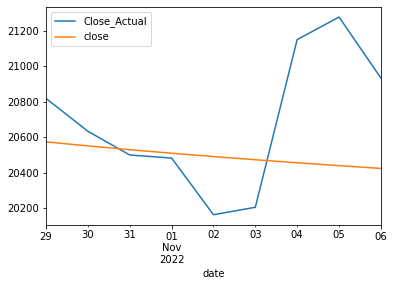

In [59]:
# compare out of sample forcasts to actual values
oneWeekFC = pd.DataFrame(df_forecastF["close"])
oneWeekActual = newData.join(oneWeekFC)
oneWeekActual.plot()

# Conclusion
The mape and mpe show that the accuracy is very strong. 
The RSME says that the residuals are fairly spread out, but the closing price is in the tens of thousands so an RSME of 506.7 is not very large.
The plot shows that the predictions follow a trend similar to the actual values.


# Next Steps
1. Remove outliers
2. Try different variable combinations and lag levels
3. Accoount for the Trend in the Data by incorporating an intercept into the model or detrending the data
4. Try different VARMAX orders
5. Try standard ARMA